In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve


In [199]:
%matplotlib inline
sns.set(style='whitegrid', rc={'figure.figsize':(15, 10)})

In [200]:
data = pd.read_csv("D:\Compressed/hearts.csv")

In [201]:
data_viz = data

In [202]:
data_viz.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [203]:
def male_female(pateints):
    sex=pateints
    if sex == 1:
        return "Male"
    else:
        return "Female"

In [204]:
data_viz['Gender'] = data_viz['sex'].apply(male_female)

In [205]:
def chestpain_type(value):
    cp = value
    if cp == 1:
        return "Typical Angina"
    elif cp == 2:
        return "Atypical Angina"
    elif cp == 3:
        return "Non-anginal Pain"
    else:
        return "Asymptomatic"

In [206]:
data_viz['Chest_Pain_Type'] = data_viz['cp'].apply(chestpain_type)

In [207]:
data_viz.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender,Chest_Pain_Type
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male,Non-anginal Pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male,Atypical Angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female,Typical Angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male,Typical Angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female,Asymptomatic


In [208]:
def cardio_elec(cardio):
    cg = cardio
    if cg == 0:
        return 'Normal'
    elif cg == 1:
        return 'Having ST/T wave abnormality'
    else:
        return "Definite left ventricular hypertrophy by Estes's criteria"

In [209]:
data_viz['cardio'] = data_viz['restecg'].apply(cardio_elec)

In [210]:
def diabetic(Diabetes):
    fbs = Diabetes
    if fbs == 1:
        return "Diabetic"
    else:
        return "Non-Diabetic"

In [211]:
data['Diabetes']=data['fbs'].apply(diabetic)

In [212]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender,Chest_Pain_Type,cardio,Diabetes
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male,Non-anginal Pain,Normal,Diabetic
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male,Atypical Angina,Having ST/T wave abnormality,Non-Diabetic
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female,Typical Angina,Normal,Non-Diabetic
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male,Typical Angina,Having ST/T wave abnormality,Non-Diabetic
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female,Asymptomatic,Having ST/T wave abnormality,Non-Diabetic


In [213]:
data = data.drop(columns='Gender')
data = data.drop(columns="Chest_Pain_Type")
data = data.drop(columns="cardio")
data = data.drop(columns="Diabetes")

In [214]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [215]:
data_viz.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender,Chest_Pain_Type,cardio,Diabetes
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male,Non-anginal Pain,Normal,Diabetic
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male,Atypical Angina,Having ST/T wave abnormality,Non-Diabetic
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female,Typical Angina,Normal,Non-Diabetic
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male,Typical Angina,Having ST/T wave abnormality,Non-Diabetic
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female,Asymptomatic,Having ST/T wave abnormality,Non-Diabetic


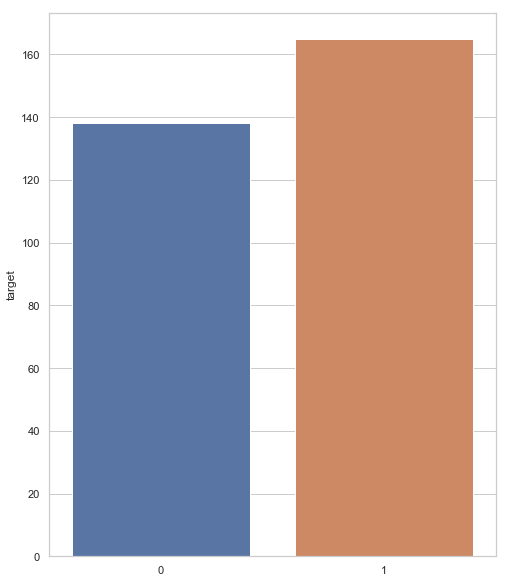

In [216]:
values = data.target.value_counts()
indexes = values.index
sns.set(style='whitegrid', rc={'figure.figsize':(8, 10)})
sns.barplot(indexes, values)

In [217]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients not having Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients having Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients not having Heart Disease: 45.54%
Percentage of Patients having Heart Disease: 54.46%


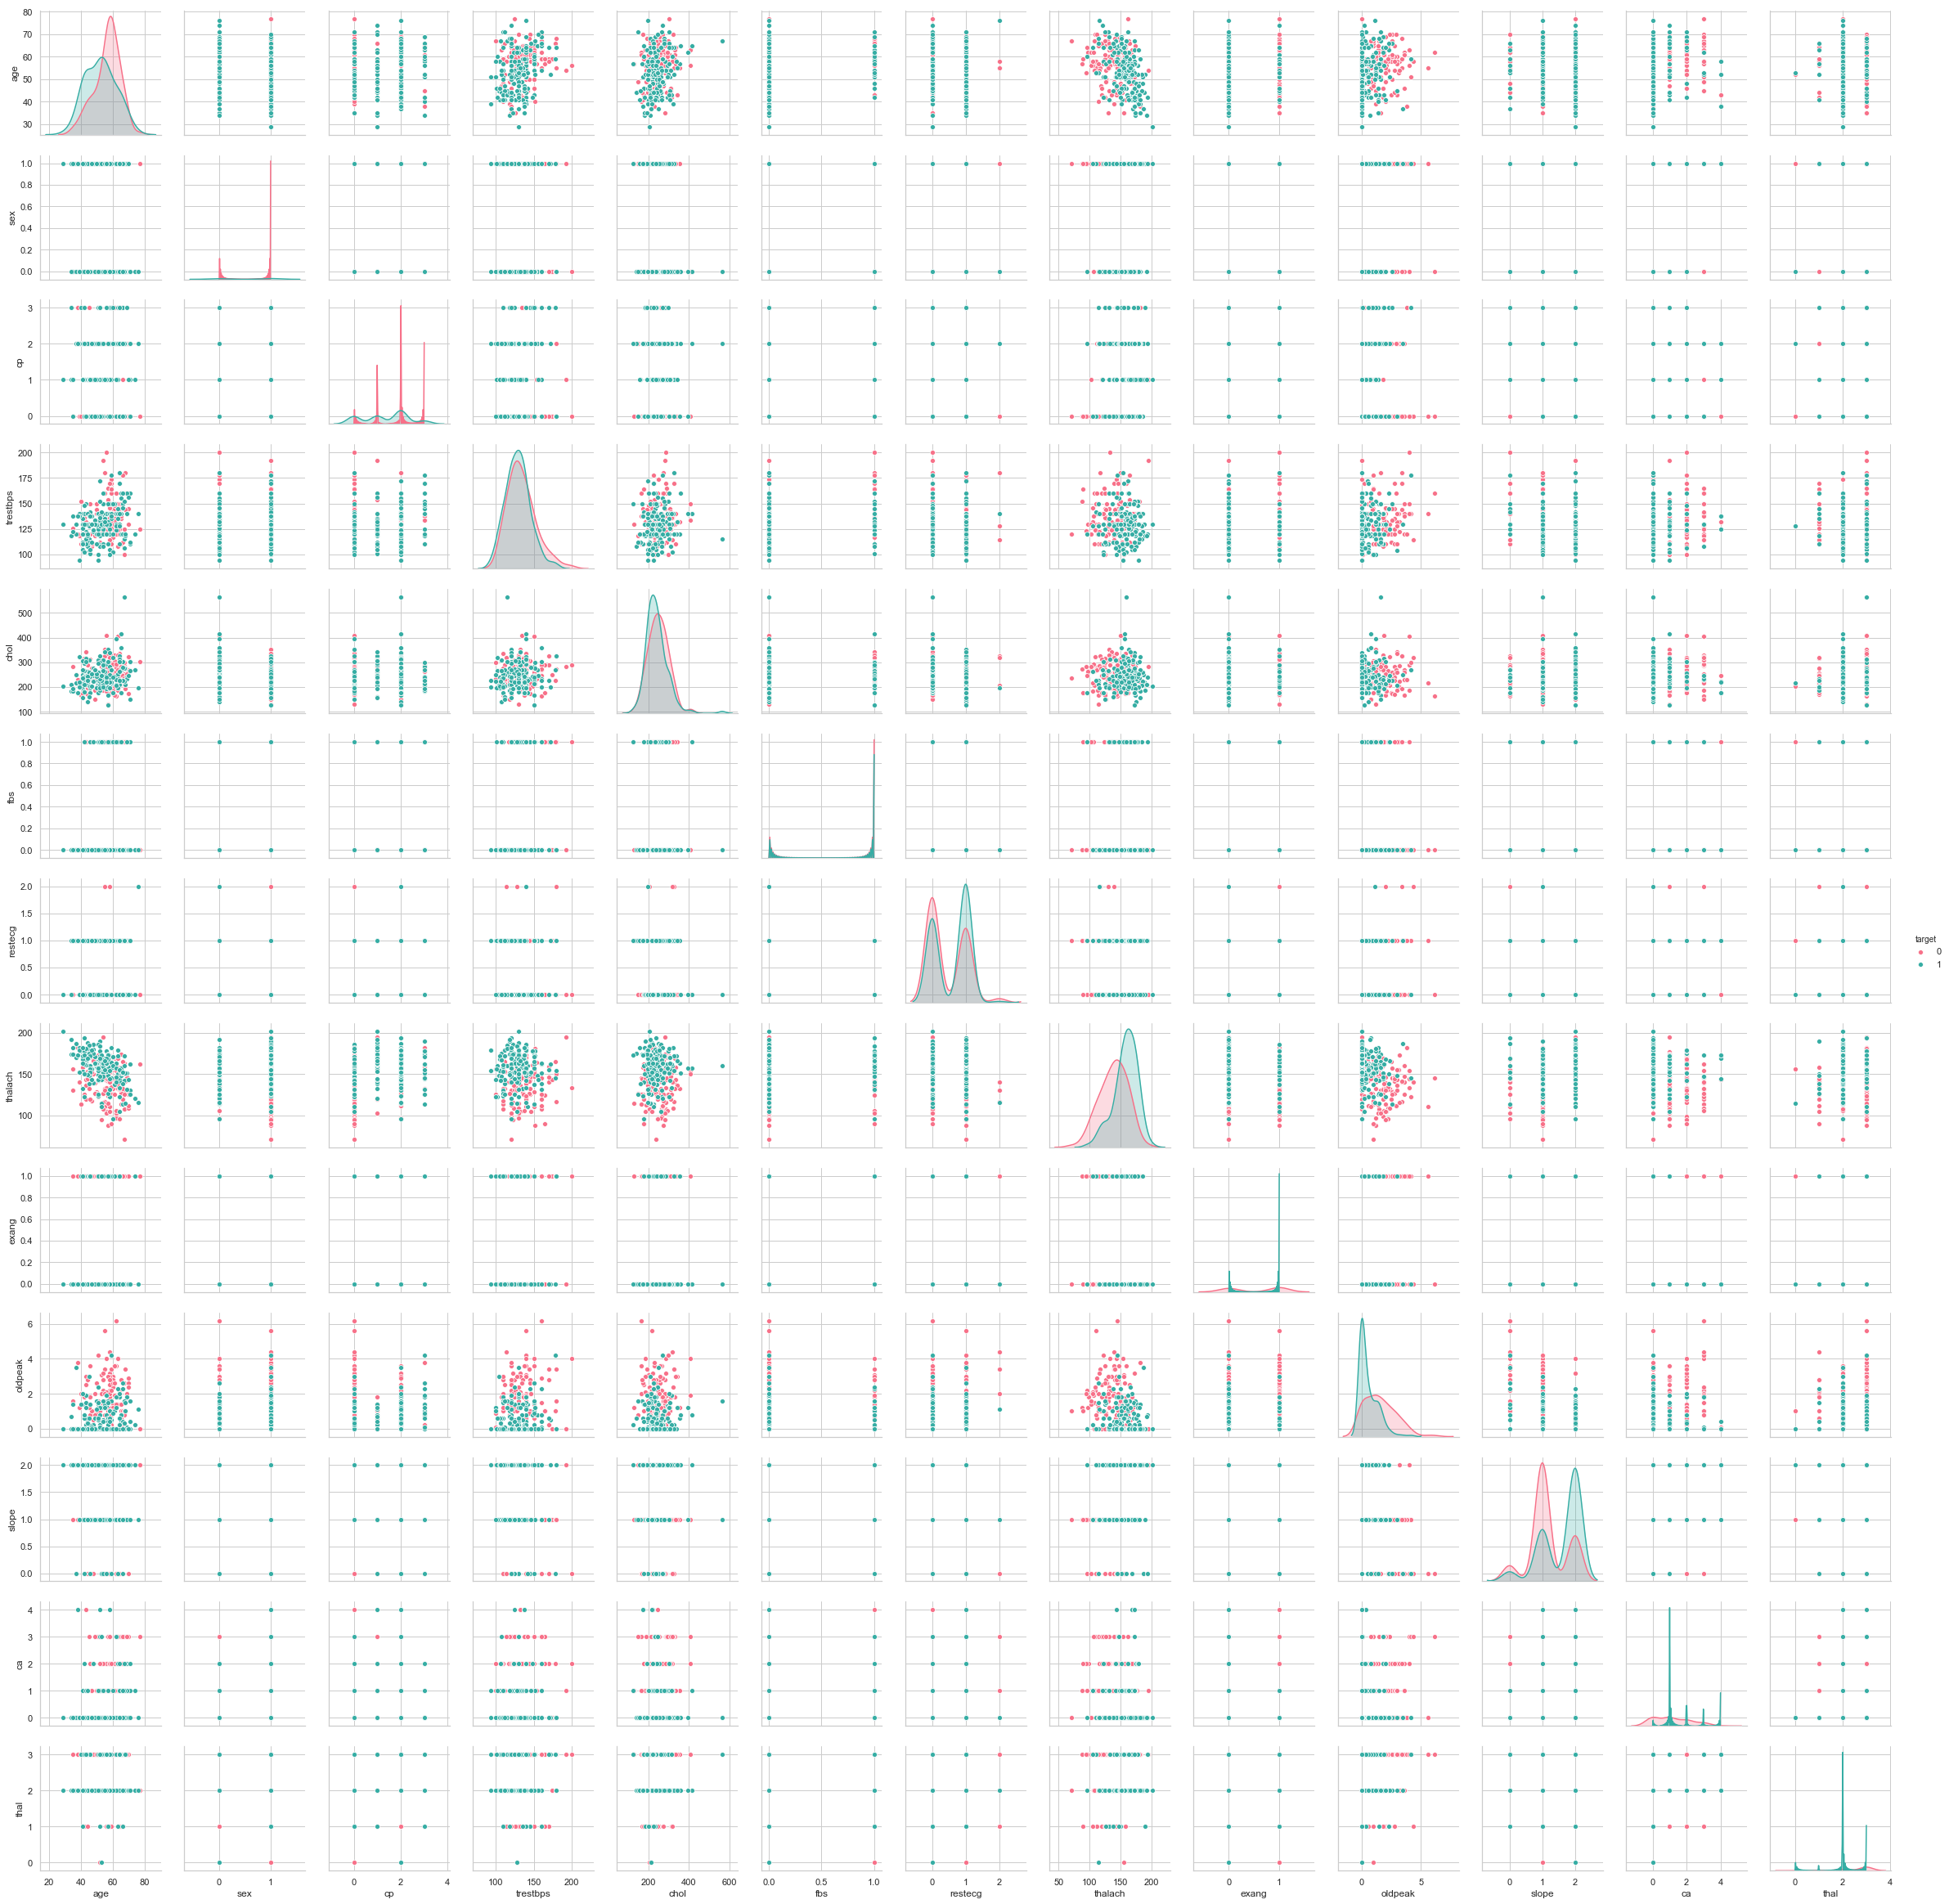

In [218]:
sns.pairplot(data=data, vars=data.columns.values[:-1], hue='target',palette="husl")

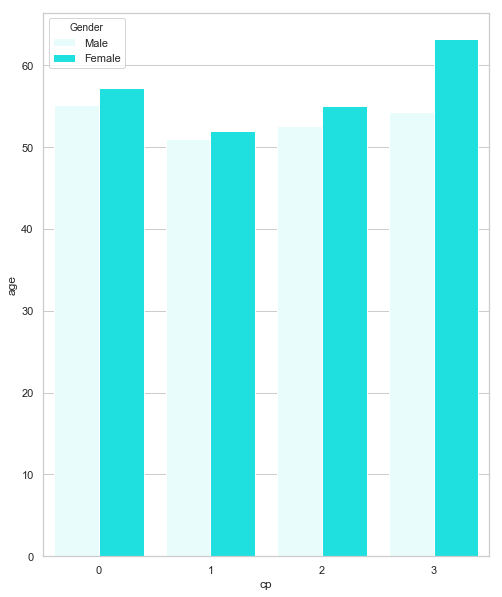

In [219]:
sns.barplot(x='cp', y='age', data=data_viz, hue='Gender', ci=None, color = 'aqua')
sns.set(style='whitegrid', rc={'figure.figsize':(15, 10)})

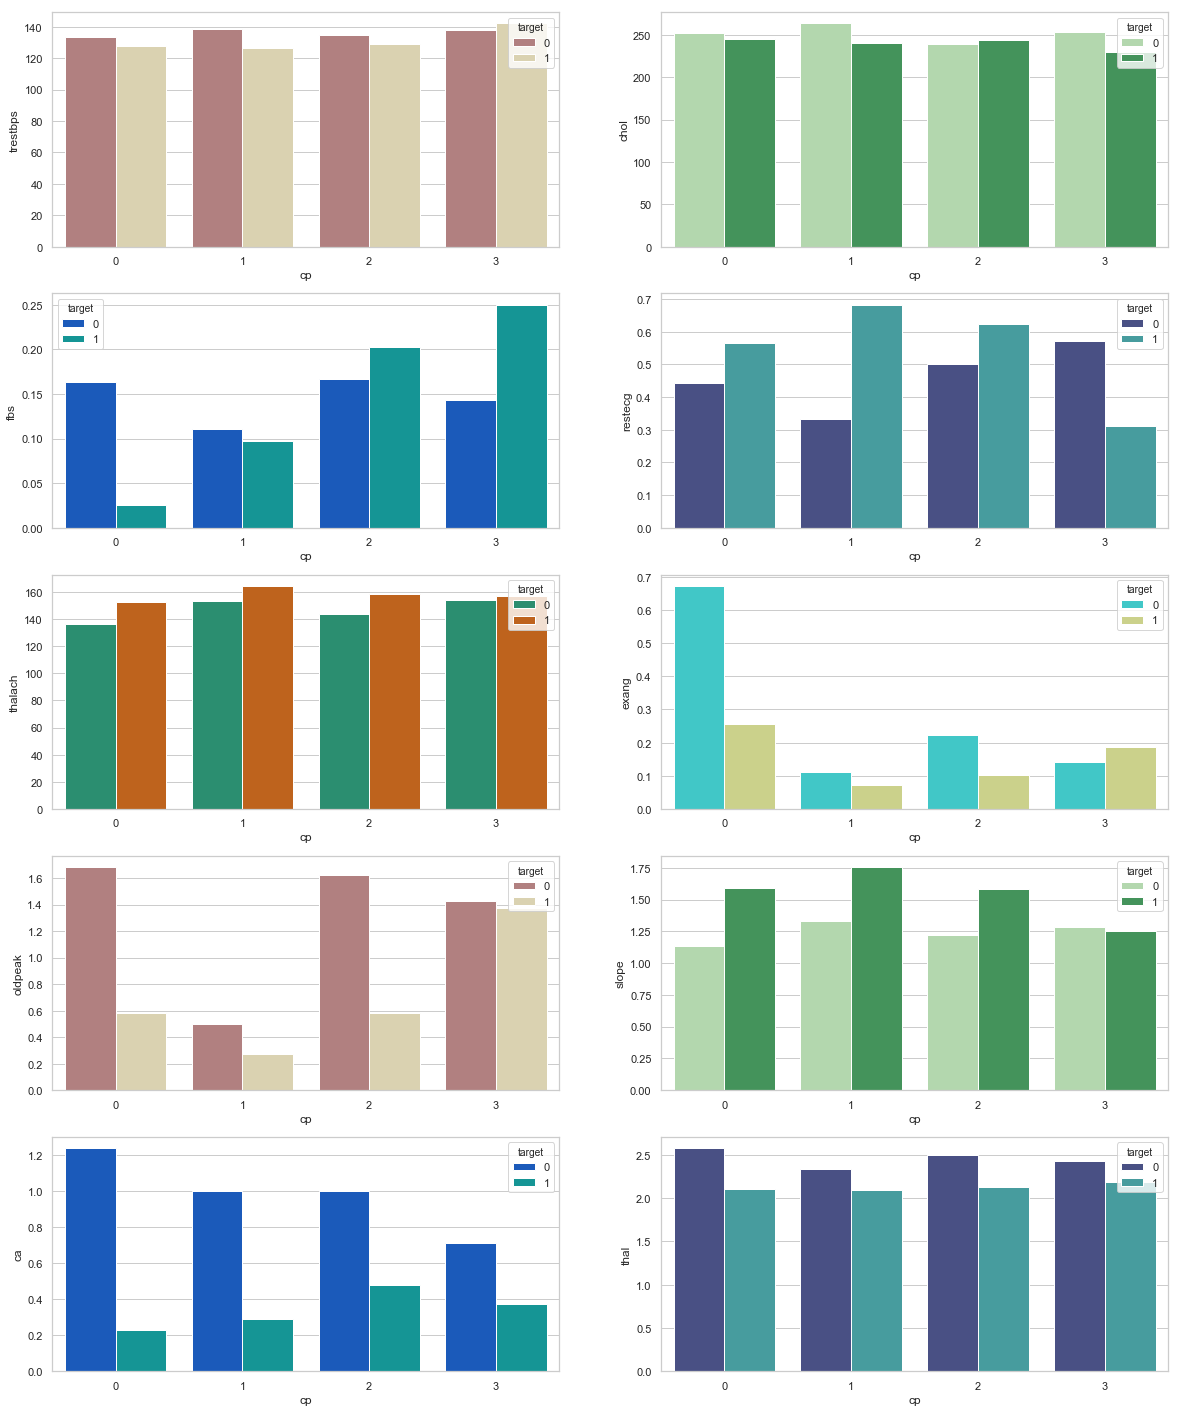

In [220]:
fig = plt.figure(figsize=(20, 25))
palettes = ['pink', 'Greens', 'winter', 'mako', 'Dark2', 'rainbow'] * 2

for x in range(10):
    fig1 = fig.add_subplot(5, 2, x+1)
    sns.barplot(x='cp', y=data.columns.values[x+3], data=data, hue='target', ci=None, palette=palettes[x])

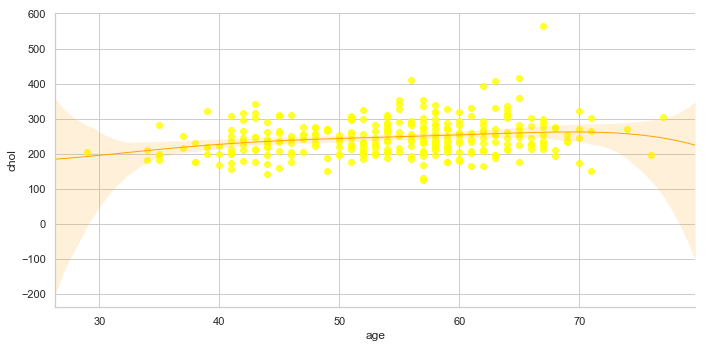

In [221]:
#cholestrol level of every age group
sns.lmplot('age','chol',data,palette="bright",aspect=2,order=5,
          scatter_kws={'marker':'o','color':'yellow'},
          line_kws={'linewidth':1,'color':'orange'})

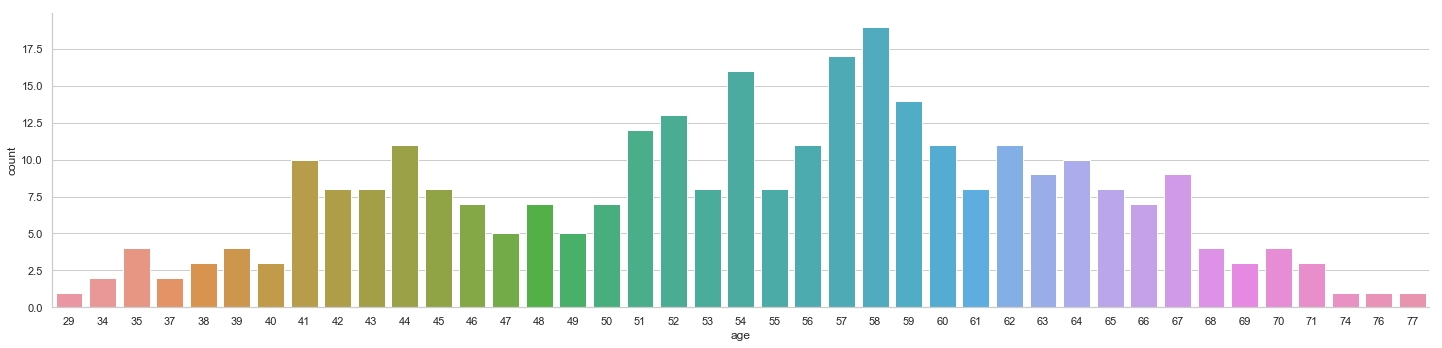

In [222]:
#percentage of people consulting doctors for heart disease categorised on the basis of age
sns.catplot('age',data=data,kind="count",aspect=4)

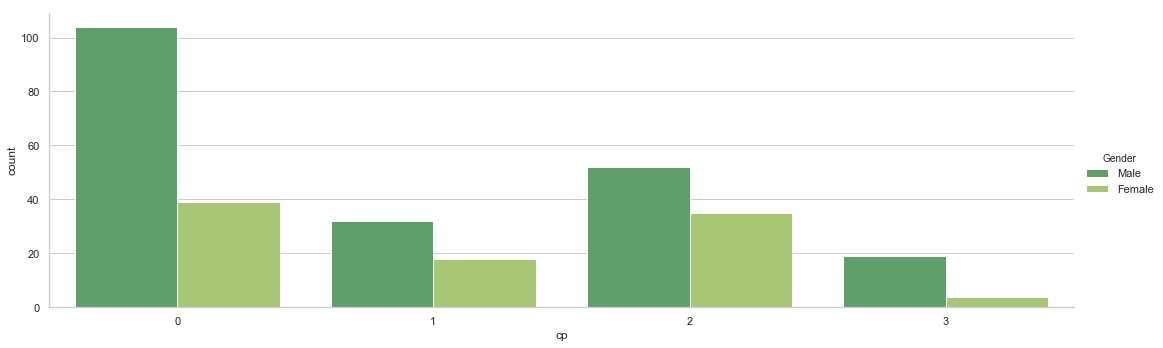

In [223]:
#people having different type of chest pain categorised on basis of sex
# from the obtained visulas it is quite confirming that MAle have more chest pain as compared to female
sns.catplot('cp',data=data_viz,hue='Gender',kind="count",aspect=3,palette="summer")

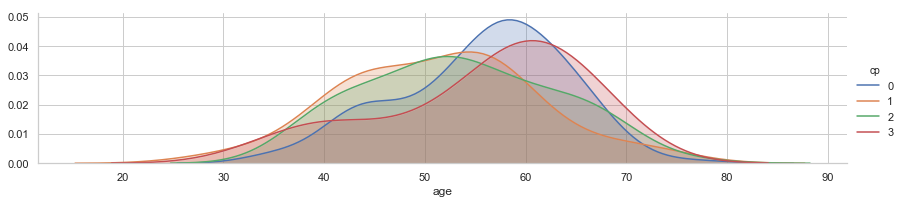

In [224]:
#different ages of people having amount of chest pain of each type
fig = sns.FacetGrid(data,hue='cp',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)



fig.add_legend()

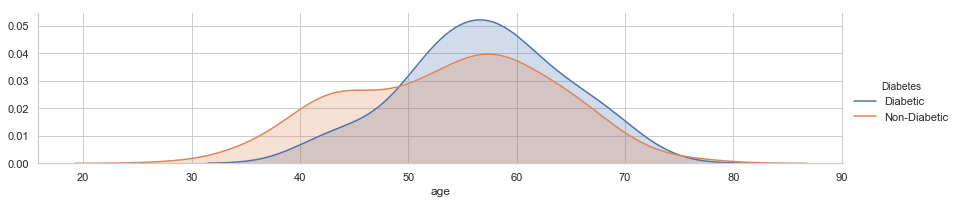

In [225]:
# Diabetic and non-diabetic person on basis of age
fig = sns.FacetGrid(data_viz,hue='Diabetes',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)



fig.add_legend()

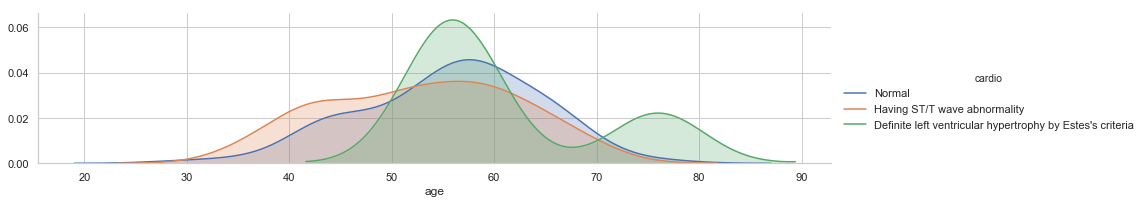

In [226]:
# Different cardio type on basis of age
cardi = sns.FacetGrid(data_viz,hue='cardio',aspect=4)
cardi.map(sns.kdeplot,'age',shade=True)



cardi.add_legend()

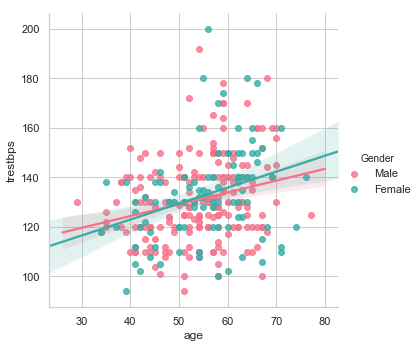

In [227]:
#Resting blood pressure of different age group categorised on basis of Gender
sns.lmplot('age','trestbps',hue='Gender',data=data_viz, palette = 'husl')

In [228]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [229]:
data_viz.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Gender,Chest_Pain_Type,cardio,Diabetes
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male,Non-anginal Pain,Normal,Diabetic
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male,Atypical Angina,Having ST/T wave abnormality,Non-Diabetic
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female,Typical Angina,Normal,Non-Diabetic
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male,Typical Angina,Having ST/T wave abnormality,Non-Diabetic
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female,Asymptomatic,Having ST/T wave abnormality,Non-Diabetic


No handles with labels found to put in legend.


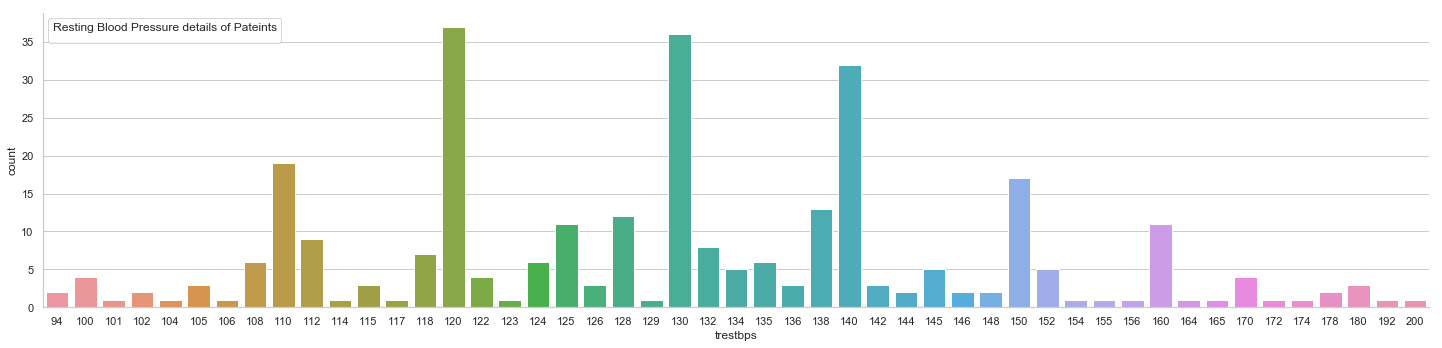

In [230]:
# value of every blood pressure data obtained on basis of count
sns.catplot('trestbps',data=data_viz,kind="count",aspect=4)
plt.legend(title='Resting Blood Pressure details of Pateints', loc='upper left')

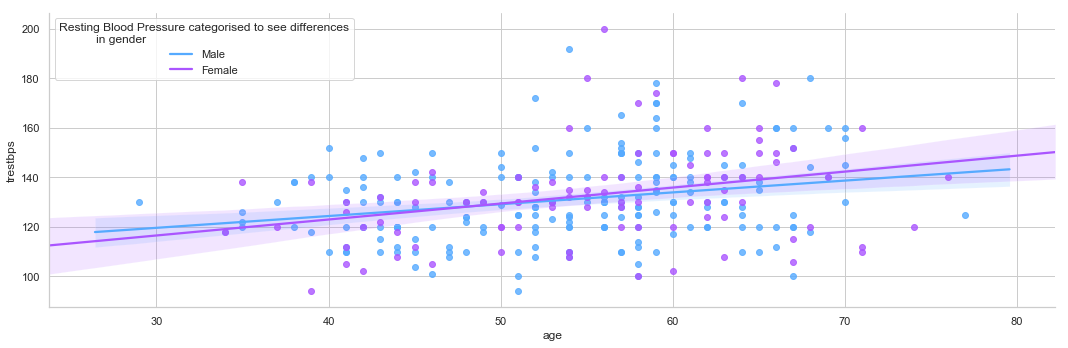

In [231]:
#resting blood pressure depending diffrent age group of people age is divided into two categories i.e. male and female

g = sns.lmplot(
    x="age", 
    y="trestbps", 
    hue="Gender", 
    data=data_viz,  
    legend=False,
    aspect=3,
    palette='cool'
    
)

plt.legend(title='''Resting Blood Pressure categorised to see differences
           in gender''', loc='upper left', labels=['Male', 'Female'])
plt.show(g)

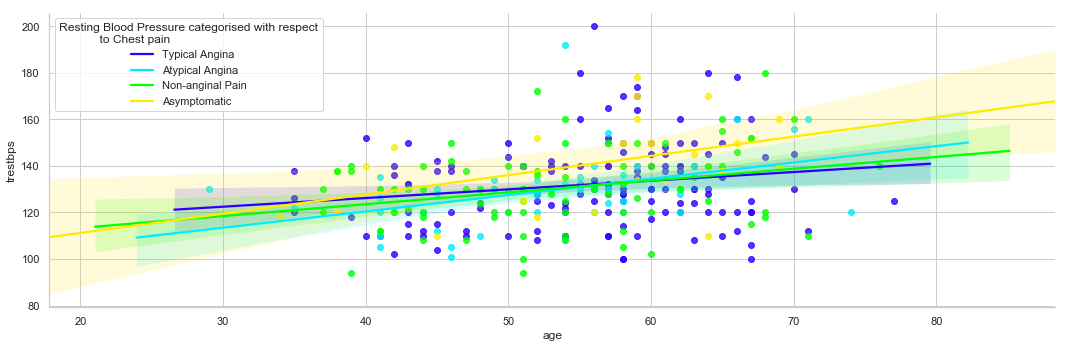

In [232]:
# different resting bloop pressure on basis of age which is differnetiated in four categories i.e. Chest pain(1 to 4)
g = sns.lmplot(
    x="age", 
    y="trestbps", 
    hue="cp", 
    data=data_viz,  
    legend=False,
    aspect=3,
    palette='gist_rainbow_r'
)

plt.legend(title='''Resting Blood Pressure categorised with respect
            to Chest pain''', loc='upper left', labels=['Typical Angina', 'Atypical Angina','Non-anginal Pain','Asymptomatic'])
plt.show(g)

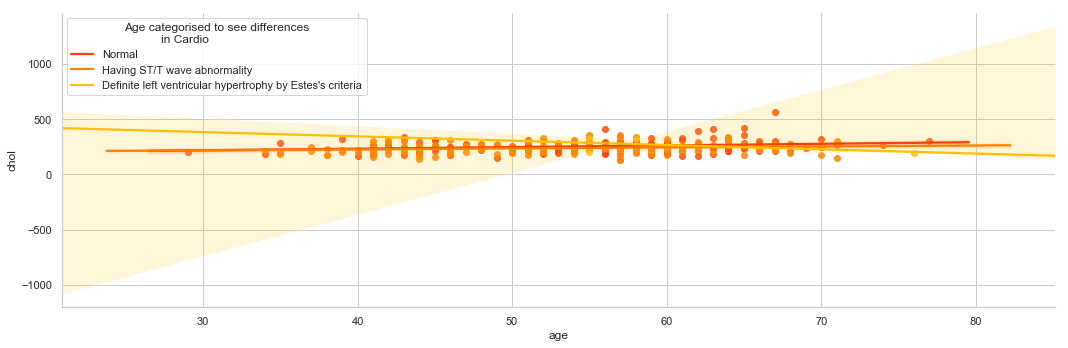

In [233]:
# cholestrol of every age group where age group is further classified into different cardio

h = sns.lmplot(
    x="age", 
    y="chol", 
    hue="cardio", 
    data=data_viz,  
    legend=False,
    aspect=3,
    palette = 'autumn'
)

plt.legend(title='''Age categorised to see differences
           in Cardio''', loc='upper left', labels=['Normal', 'Having ST/T wave abnormality',
                                                   "Definite left ventricular hypertrophy by Estes's criteria"])
plt.show(h)

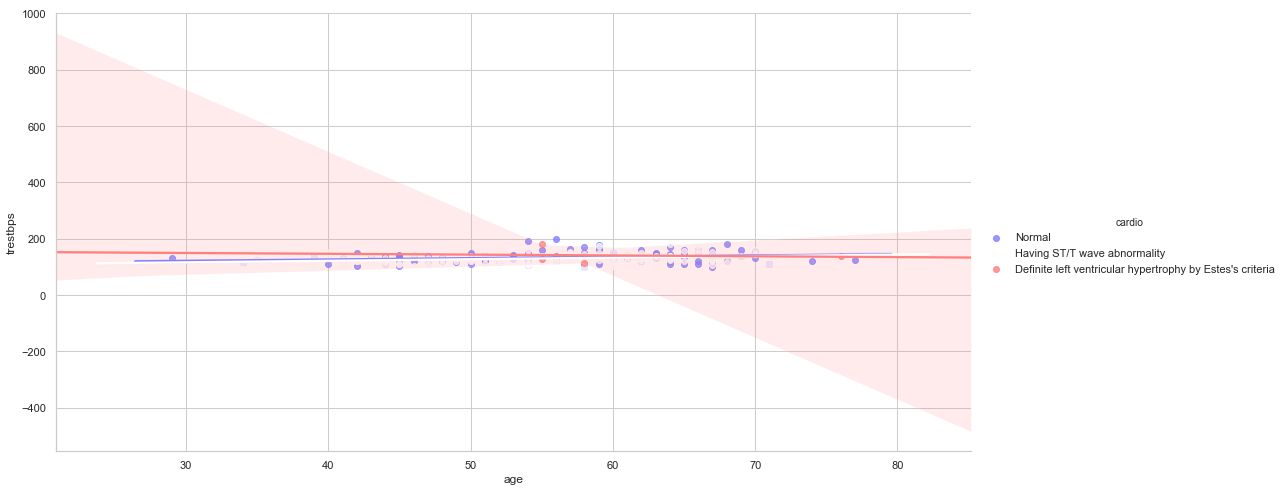

In [234]:
#resting blood pressure of differnt age group which is further classified into age having different cardio problem
sns.lmplot('age','trestbps',data=data_viz,hue='cardio',palette='bwr',aspect=2,height=7)

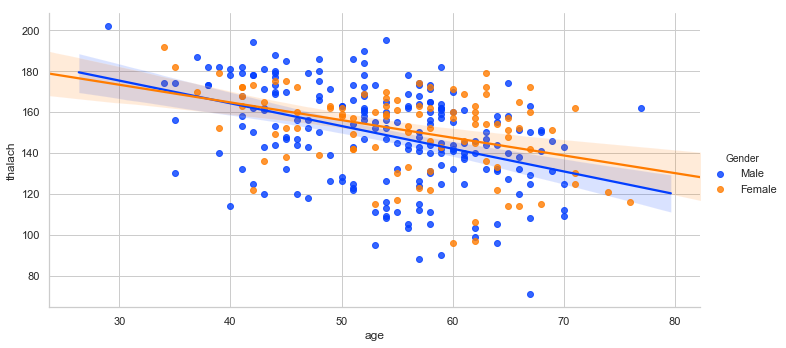

In [235]:
# maximum heart rate acheived of different age group classified in different gender
sns.lmplot('age','thalach',data_viz,palette="bright",aspect=2,hue='Gender')

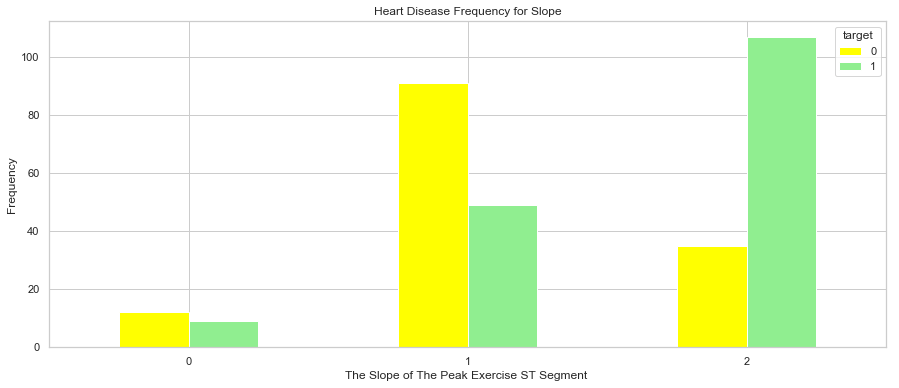

In [236]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['yellow','lightgreen' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')

plt.show()

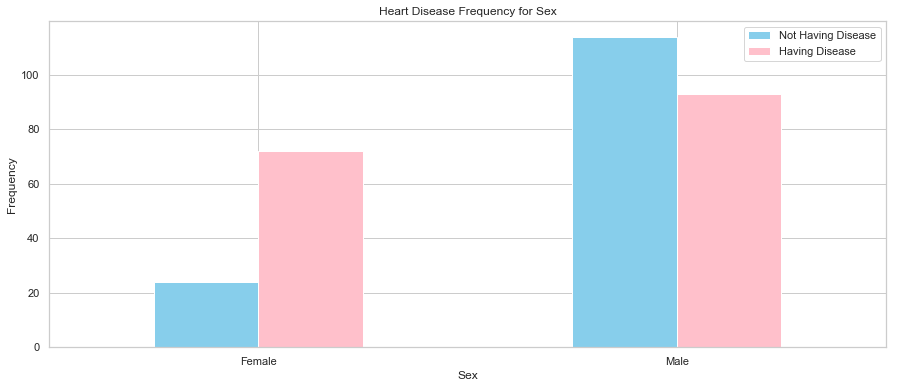

In [237]:
pd.crosstab(data_viz.Gender,data.target).plot(kind="bar",figsize=(15,6),color=['skyblue','pink' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["Not Having Disease", "Having Disease"])
plt.ylabel('Frequency')
plt.show()

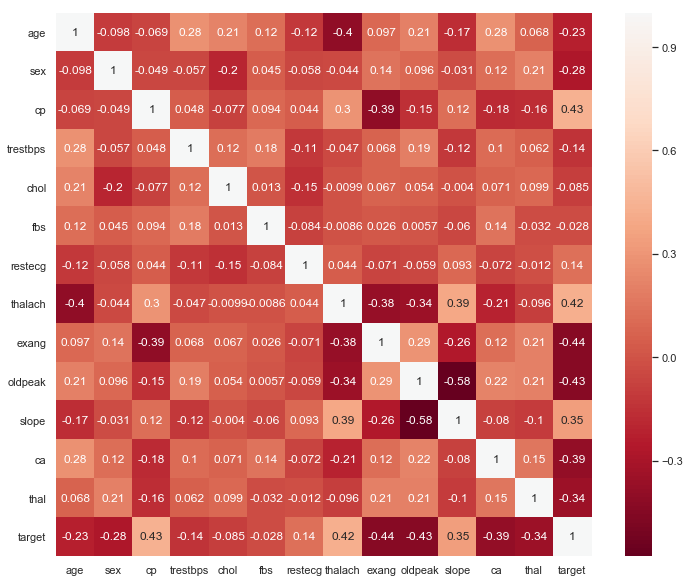

In [238]:
correlation = data.corr()

fig = plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, center=1, cmap='RdBu')

In [239]:
#Here we can find out that fbs has significantly various values which are dependent on the chest pain
#Resting ecg results with normal values mean that patient hasn't heart diseases (exception: asymptomatic chest pain, value 3)
#If exang is 1 a patient must be healthy (exception: asymptomatic chest pain, value 3)
#If oldpeak is high a patient must be healthy (exception: asymptomatic chest pain, value 3)
#It's better if slope has low value (again asymptomatic chest pain as an exception)
#High number of ca (major vessels) is always great
#It's good when thal nearly equals 3

#this colormap confirms lower slope is better

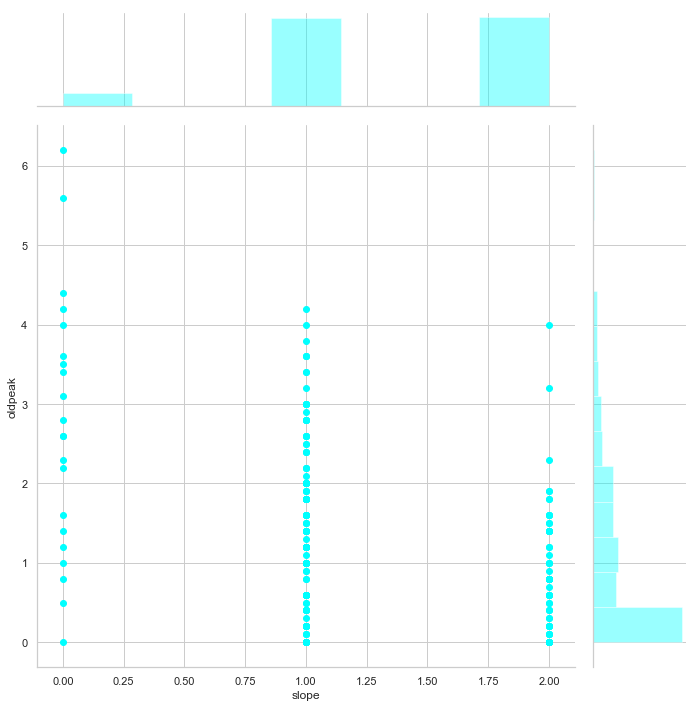

In [240]:
sns.jointplot(x='slope', y='oldpeak', data=data,color ='aqua', height=10)

In [241]:
#Here we can investigate things about features importance too. If plots for 0 and 1 are the same it means
#that correlation is low. Moreover we can see smooth values distribution for each variable

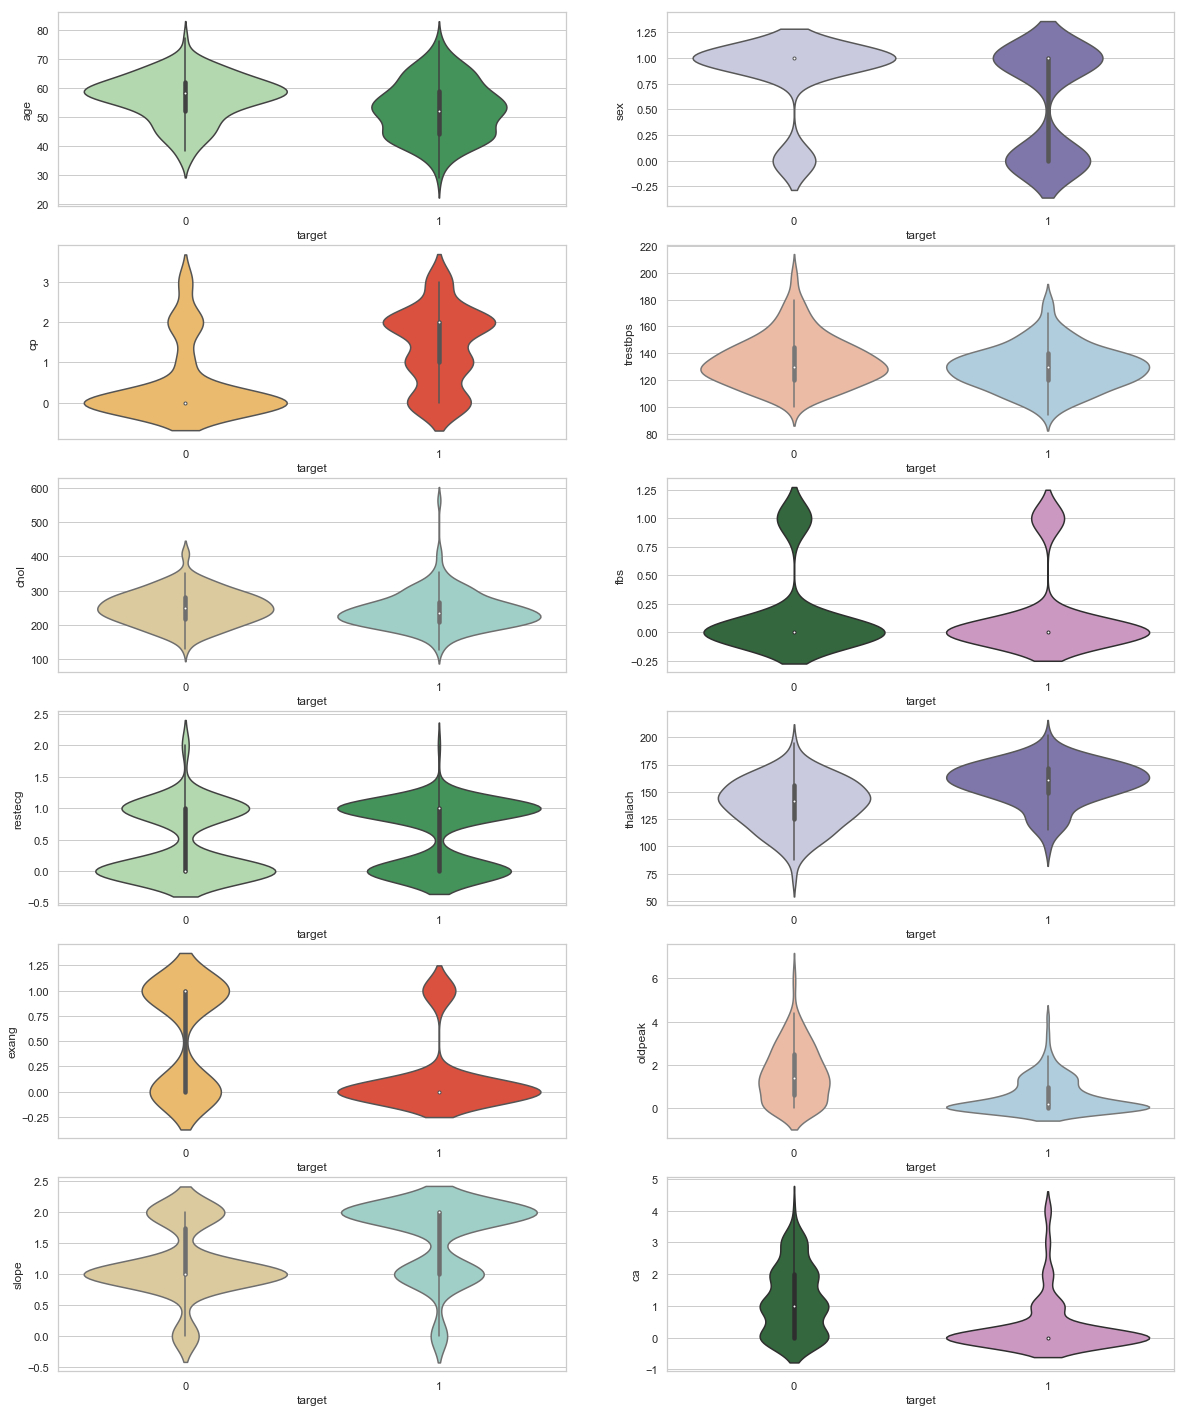

In [242]:
fig = plt.figure(figsize=(20, 25))
palettes = ['Greens', 'Purples', 'YlOrRd', 'RdBu', 'BrBG', 'cubehelix'] * 2

for x in range(12):
    fig1 = fig.add_subplot(6, 2, x+1)
    sns.violinplot(x='target', y=data.columns.values[x], data=data, palette=palettes[x])

In [243]:
bata = data

In [244]:
bata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [245]:
X = data.drop('target', axis=1)
y = data.target

selector = SelectKBest(score_func=chi2, k=5)
fitted = selector.fit(X, y)
features_scores = pd.DataFrame(fitted.scores_)
features_columns = pd.DataFrame(X.columns)

best_features = pd.concat([features_columns, features_scores], axis=1)
best_features.columns = ['Feature', 'Score']
best_features.sort_values(by='Score', ascending=True, inplace=True)
best_features

,Feature,Score
5,fbs,0.202934
6,restecg,2.978271
12,thal,5.791853
1,sex,7.576835
10,slope,9.804095
3,trestbps,14.823925
0,age,23.286624
4,chol,23.936394
8,exang,38.914377
2,cp,62.598098


In [246]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [247]:
#scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

type(X_train), type(X_test)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(numpy.ndarray, numpy.ndarray)

In [248]:
bata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [249]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [250]:
m = pd.get_dummies(bata['cp'], prefix = "cp")
n = pd.get_dummies(bata['thal'], prefix = "thal")
o = pd.get_dummies(bata['slope'], prefix = "slope")

In [251]:
frames = [bata, m, n, o]
bata = pd.concat(frames, axis = 1)
bata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [252]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [253]:
bata = bata.drop(columns = ['cp', 'thal', 'slope'])
bata.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [254]:
b = bata.target.values
a_data = bata.drop(['target'], axis = 1)

In [255]:
a = (a_data - np.min(a_data)) / (np.max(a_data) - np.min(a_data)).values

In [256]:
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size = 0.33,random_state=42)

In [257]:
a_train = a_train.T
b_train = b_train.T
a_test = a_test.T
b_test = b_test.T

In [258]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [259]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [260]:
def forwardBackward(weight,bias,x_train,y_train):    
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [261]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [262]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [263]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))


iteration: 100
cost: 0.33337126194030203


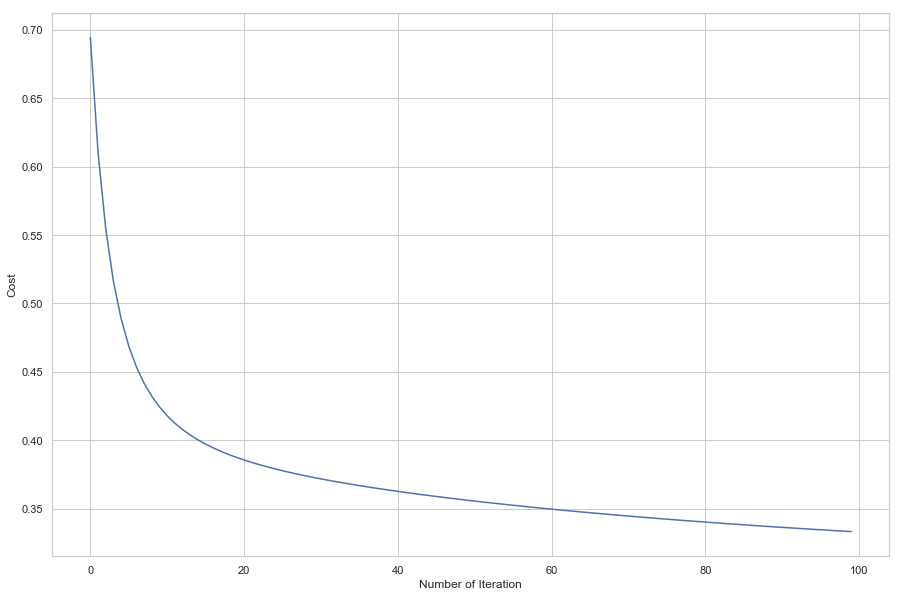

Manuel Test Accuracy: 85.00%


In [264]:
logistic_regression(a_train,b_train,a_test,b_test,1,100)

In [265]:
accuracies = {}

lr = LogisticRegression()
lr.fit(a_train.T,b_train.T)
acc = lr.score(a_test.T,b_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.00%


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [266]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(a_train.T, b_train.T)
prediction = knn.predict(a_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(a_test.T, b_test.T)*100))

2 NN Score: 68.00%


In [267]:
scores = pd.DataFrame(columns=['Model', 'Score'])

In [268]:
def show_metrics():
    fig = plt.figure(figsize=(25, 10))

    # Confusion matrix
    fig.add_subplot(121)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

    # ROC Curve
    fig.add_subplot(122)

    ns_probs = [0 for _ in range(len(y_test))]
    p_probs = model.predict_proba(X_test)[:, 1]

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, p_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='o', label='Logistic')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()
    plt.show()

In [269]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy * 100)
scores = scores.append({'Model': 'Logistic Regression', 'Score': accuracy}, ignore_index=True)

Accuracy: 81.0


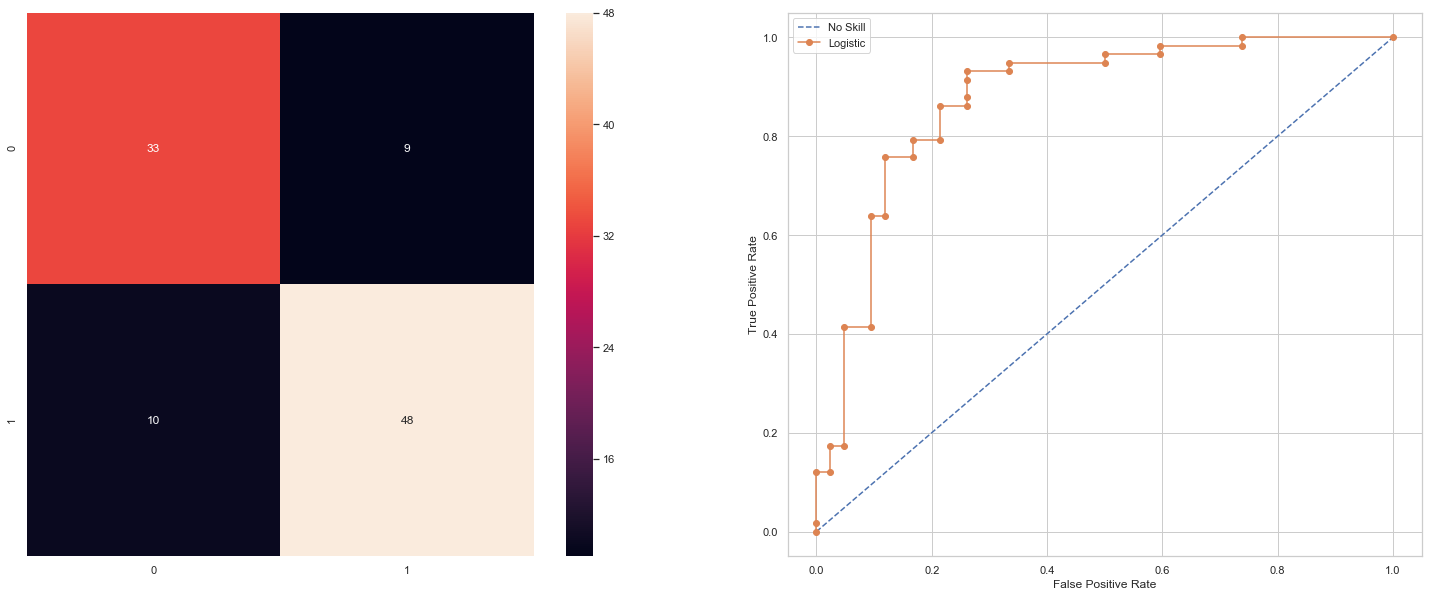

In [270]:
show_metrics()

In [271]:
model = SVC(probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy * 100)
scores = scores.append({'Model': 'SVC', 'Score': accuracy}, ignore_index=True)

Accuracy: 81.0


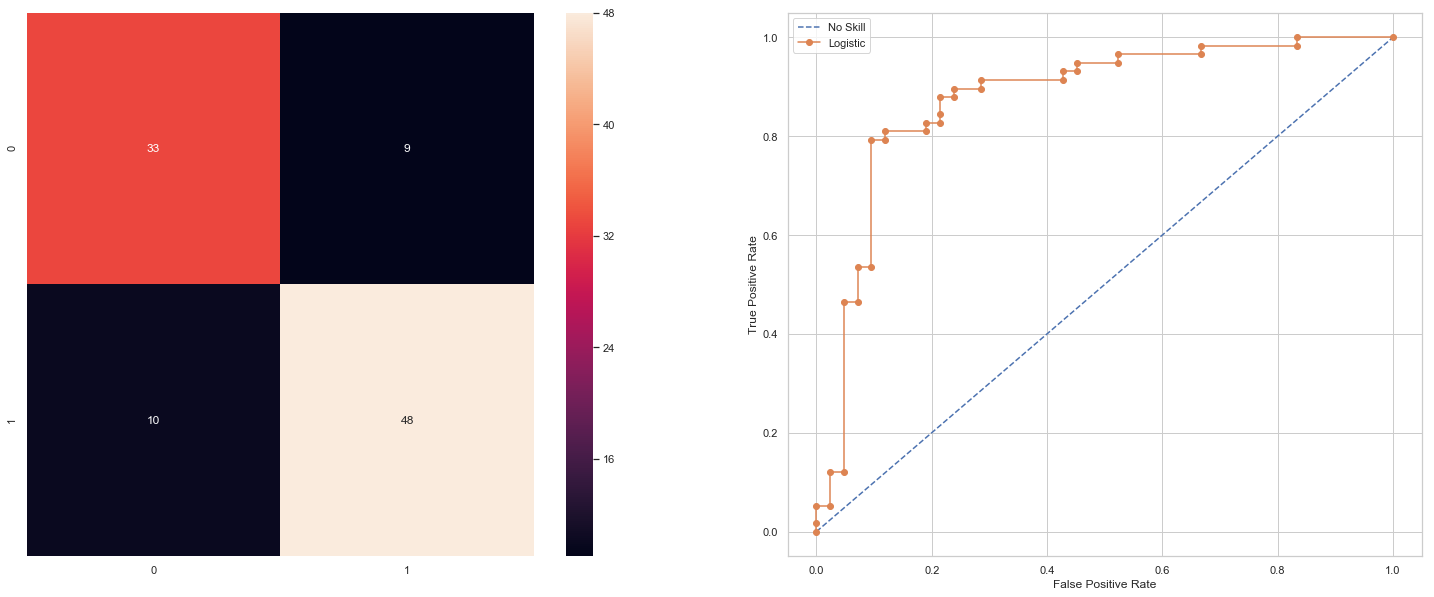

In [272]:
show_metrics()

In [273]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(a_train.T, b_train.T)

acc = svm.score(a_test.T,b_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 83.00%


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [274]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(a_train.T, b_train.T)

acc = nb.score(a_test.T,b_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 55.00%


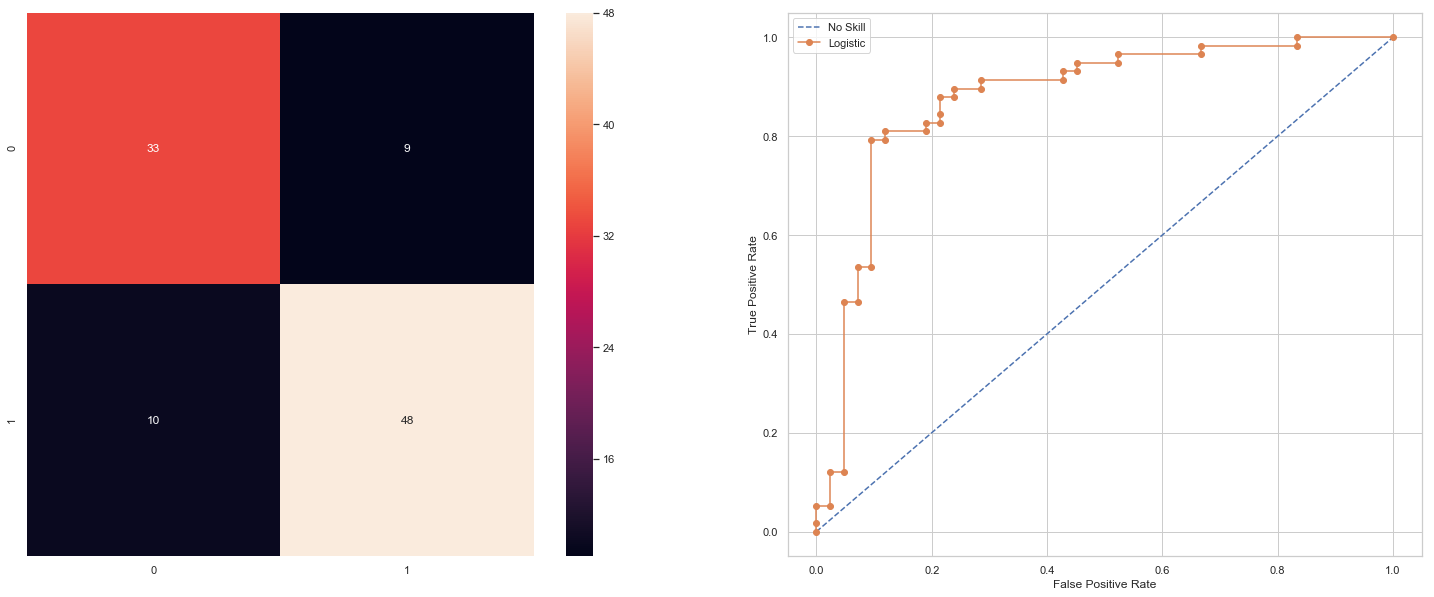

In [275]:
show_metrics()

In [276]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(a_train.T, b_train.T)

acc = dtc.score(a_test.T, b_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 74.00%


In [277]:
#random forest classifier
model = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [50, 100, 200, 300], 'max_depth': [2, 3, 4, 5]}, cv=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy * 100, model.best_params_)
scores = scores.append({'Model': 'Random Forest', 'Score': accuracy}, ignore_index=True)

Accuracy: 84.0 {'max_depth': 2, 'n_estimators': 100}


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


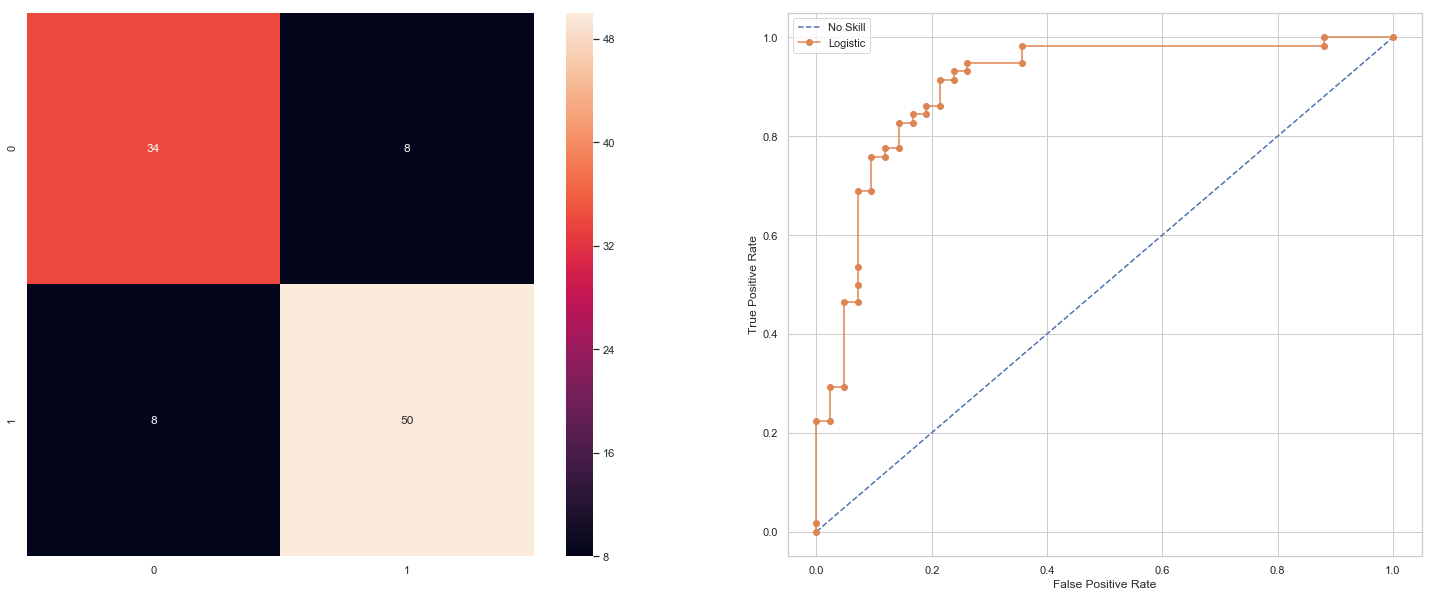

In [278]:
show_metrics()

In [279]:
#Gradient Boost Classifier
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy * 100)
scores = scores.append({'Model': 'Gradient Boosting', 'Score': accuracy}, ignore_index=True)

Accuracy: 83.0


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


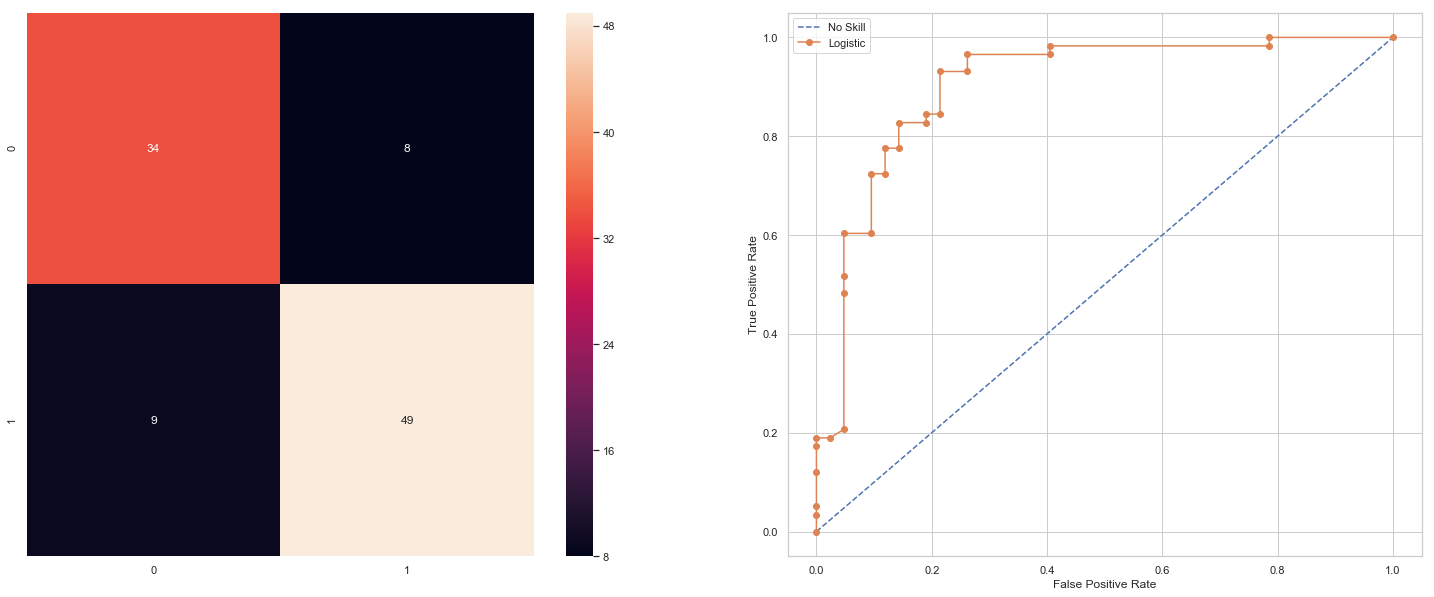

In [280]:
show_metrics()

In [281]:
#Extra Trees Classifier
model = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid={'n_estimators': [50, 100, 200, 300], 'max_depth': [2, 3, 4, 5]}, cv=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy * 100)
scores = scores.append({'Model': 'Extra Trees', 'Score': accuracy}, ignore_index=True)

Accuracy: 85.0


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


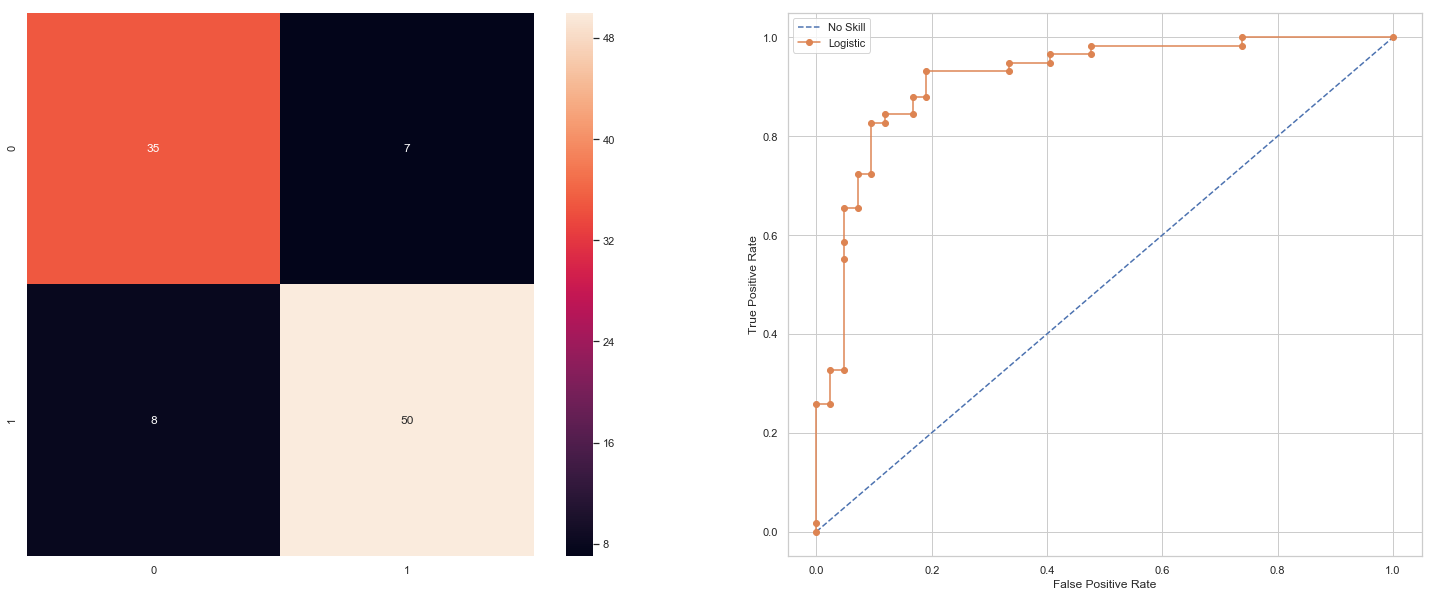

In [282]:
show_metrics()

In [283]:
#k neighbour classifier
model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [1, 2, 3]}, cv=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy * 100)
scores = scores.append({'Model': 'K-Neighbors', 'Score': accuracy}, ignore_index=True)

Accuracy: 86.0


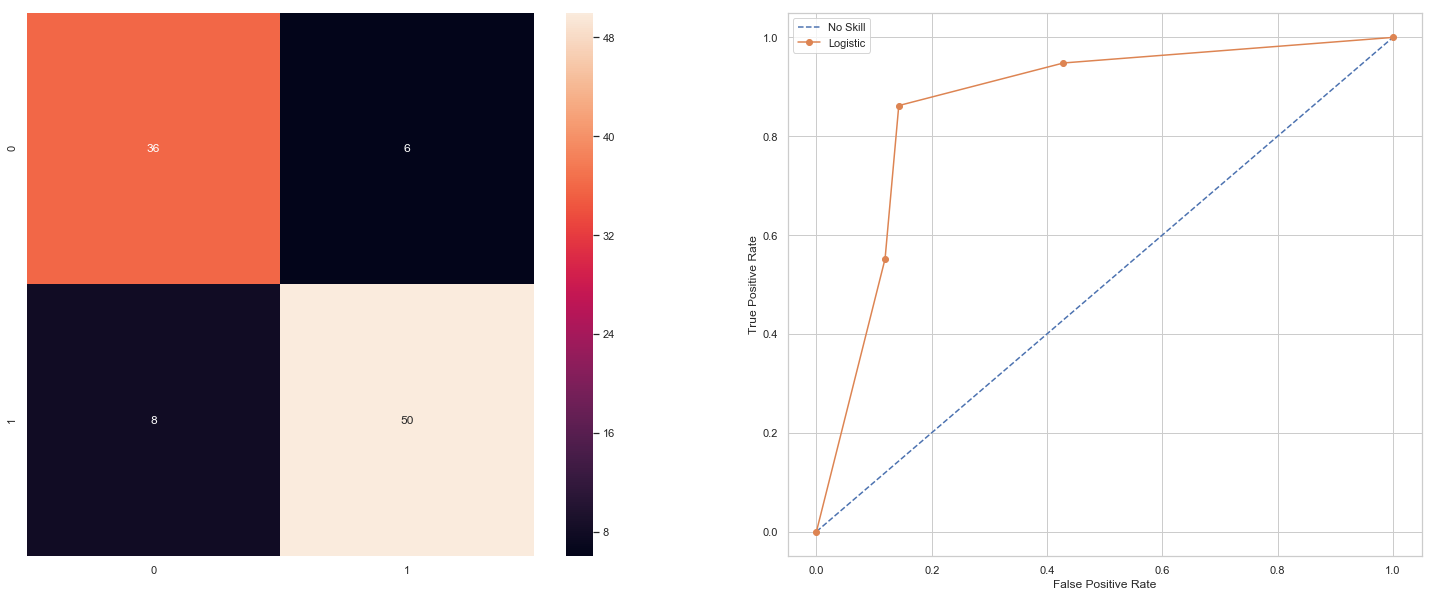

In [284]:
show_metrics()

In [285]:
#Gaussian naive bayes

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy * 100)
scores = scores.append({'Model': 'Gaussian NB', 'Score': accuracy}, ignore_index=True)

Accuracy: 84.0


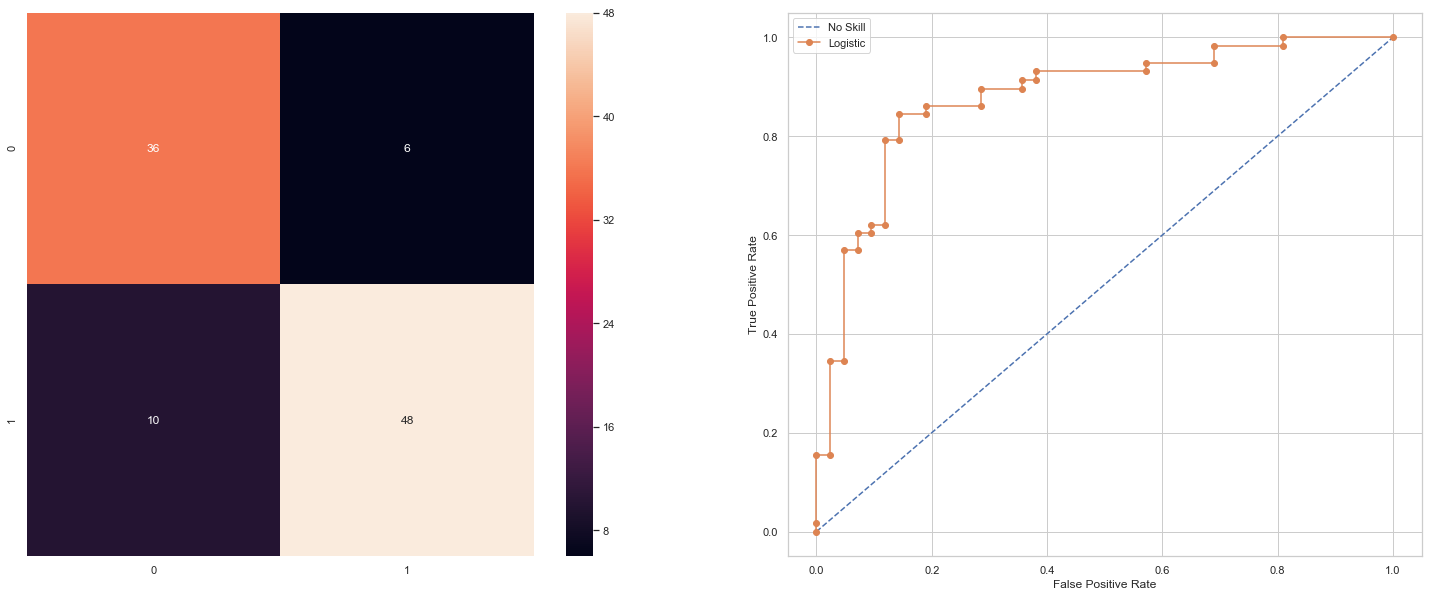

In [286]:
show_metrics()

In [287]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy * 100)
scores = scores.append({'Model': 'Decision Tree', 'Score': accuracy}, ignore_index=True)

Accuracy: 74.0


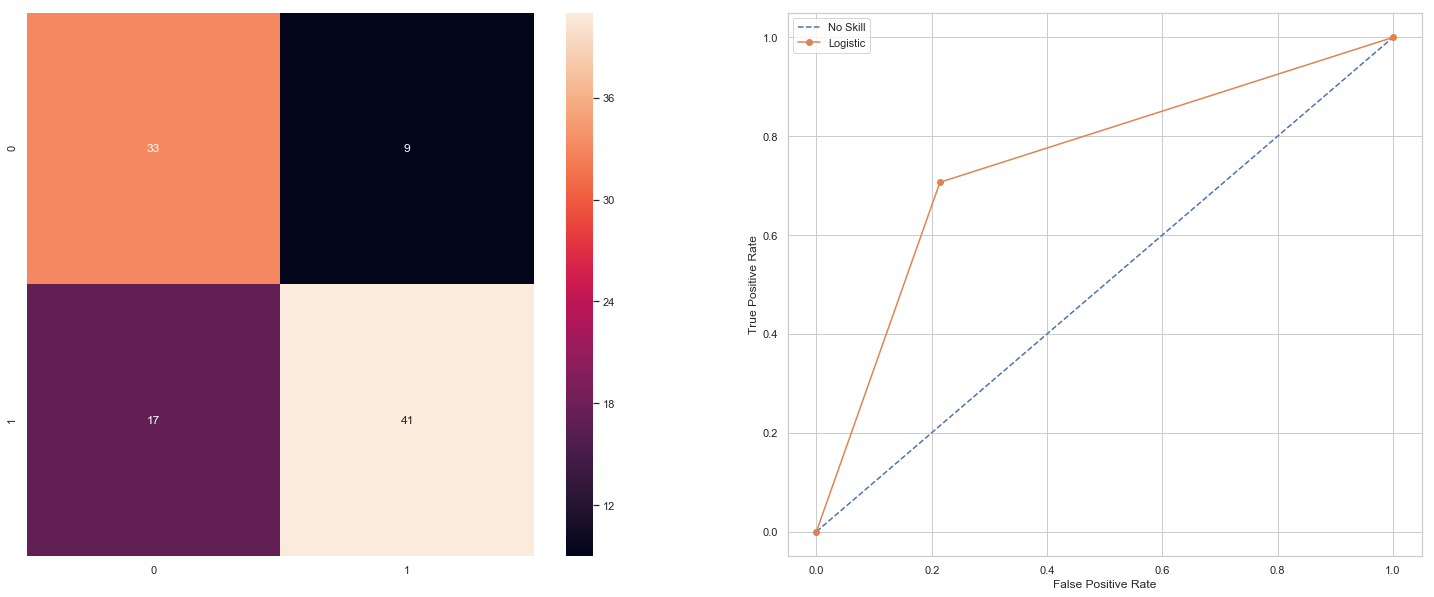

In [288]:
show_metrics()

In [289]:
#XGB classifier
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy * 100)
scores = scores.append({'Model': 'XGB Classifier', 'Score': accuracy}, ignore_index=True)

Accuracy: 80.0


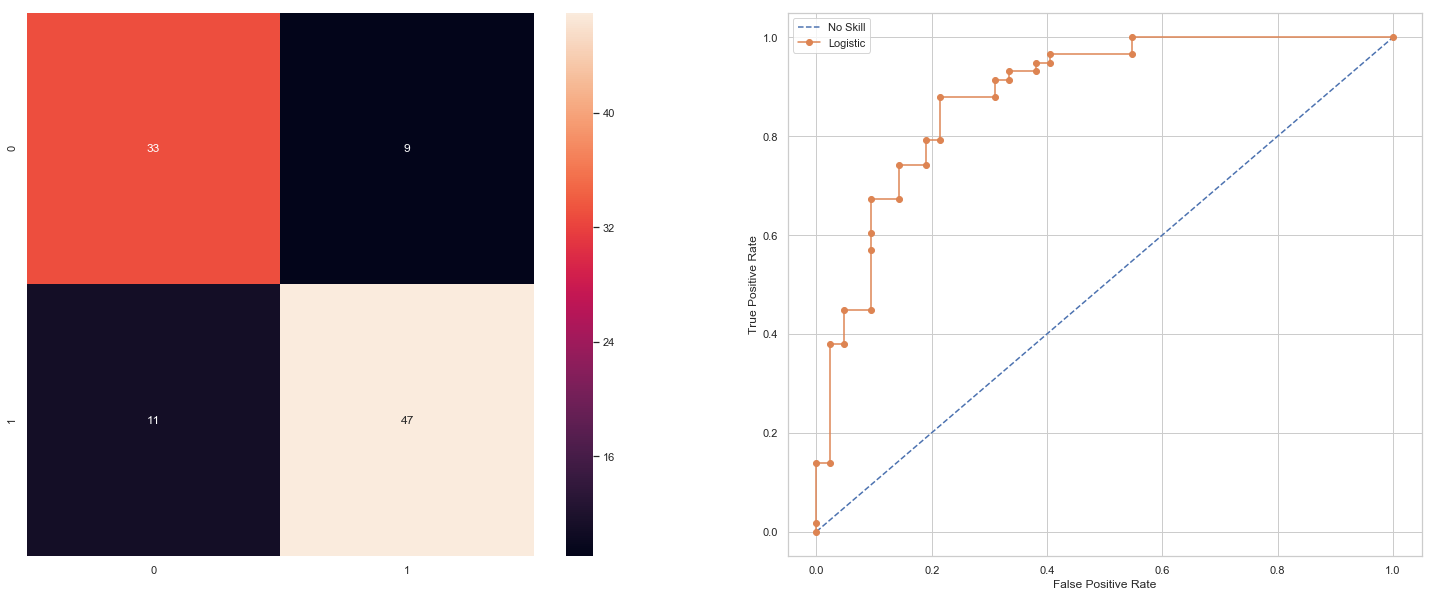

In [290]:
show_metrics()

In [291]:
scores.sort_values(by='Score', ascending=False)

,Model,Score
5,K-Neighbors,0.86
4,Extra Trees,0.85
2,Random Forest,0.84
6,Gaussian NB,0.84
3,Gradient Boosting,0.83
0,Logistic Regression,0.81
1,SVC,0.81
8,XGB Classifier,0.80
7,Decision Tree,0.74


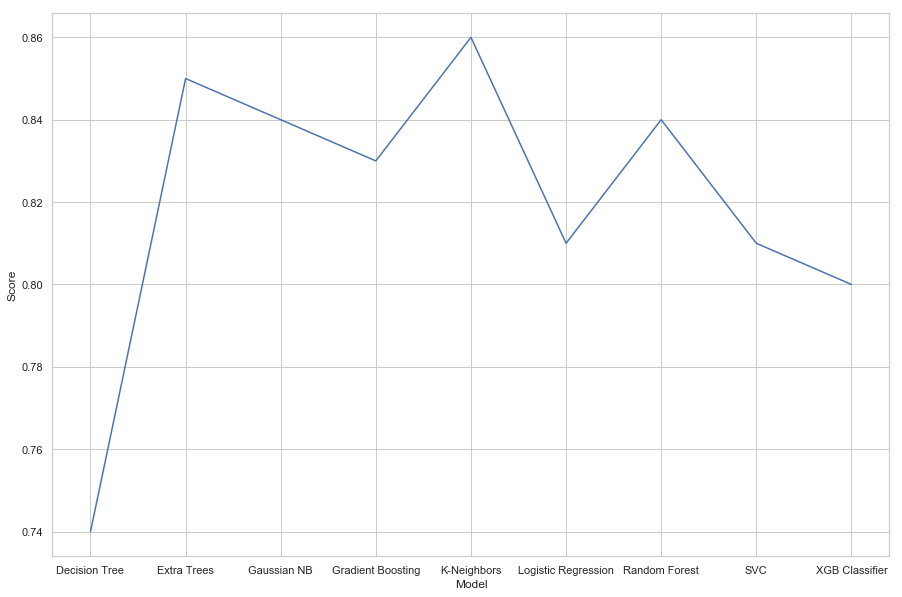

In [292]:
sns.lineplot(x='Model', y='Score', data=scores)

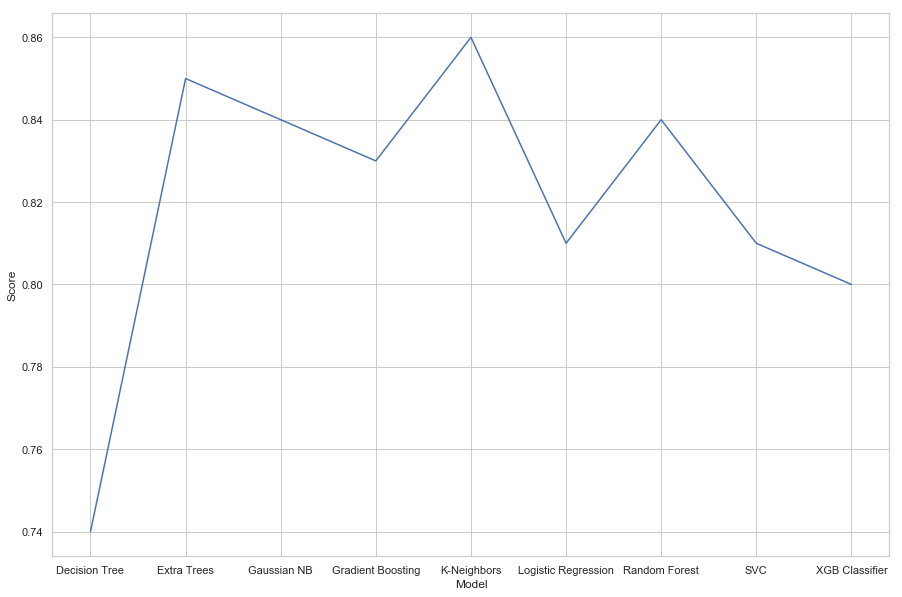

In [293]:
sns.lineplot(x='Model', y='Score', data=scores)

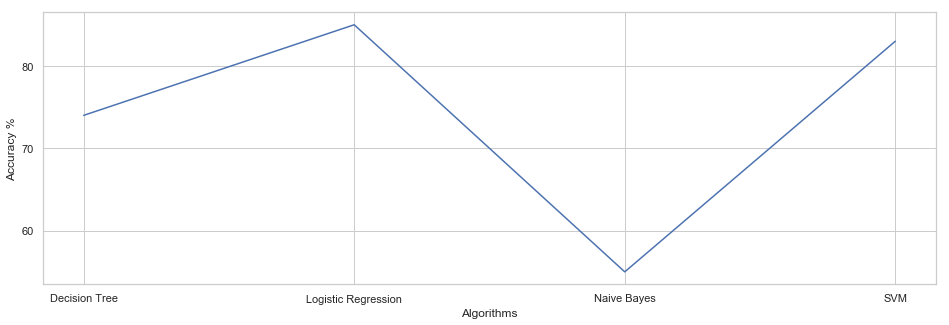

In [294]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.lineplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()